In [47]:
import pywt
import numpy as np
import pandas as pd
import matplotlib as mlt
import matplotlib.pyplot as plt
import os
import math

In [64]:
data_path="C:/Users/tony9/OneDrive/문서/DKE_assignment/Time series/time-series-analysis/bitcoin_jihun/Datasets/"
file_list = os.listdir(data_path)
file_list_txt = [file for file in file_list if file.endswith(".txt")]

In [106]:
# dwA = pd.read_csv(data_path+file_list_txt[0],delimiter='\t')
# dwB = pd.read_csv(data_path+file_list_txt[1],delimiter='\t')
# dwA = np.array(dwA).reshape(-1)
# dwB = np.array(dwB).reshape(-1)
dwA = np.loadtxt(data_path+file_list_txt[0])
dwB = np.loadtxt(data_path+file_list_txt[1])

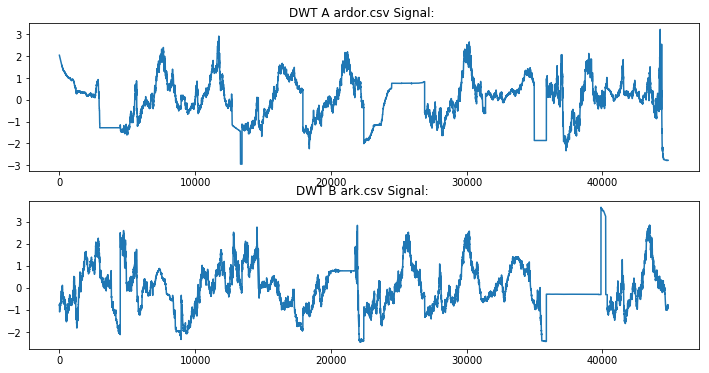

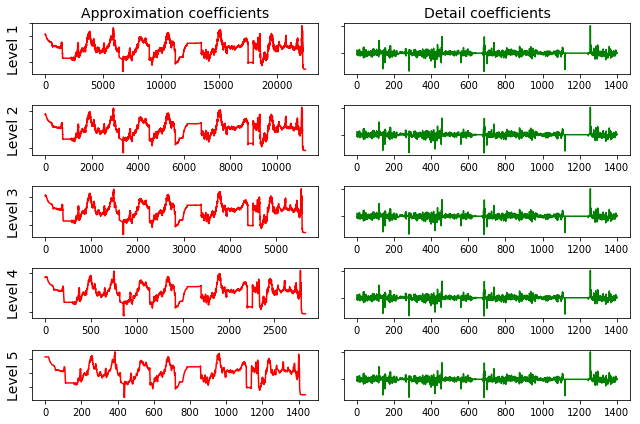

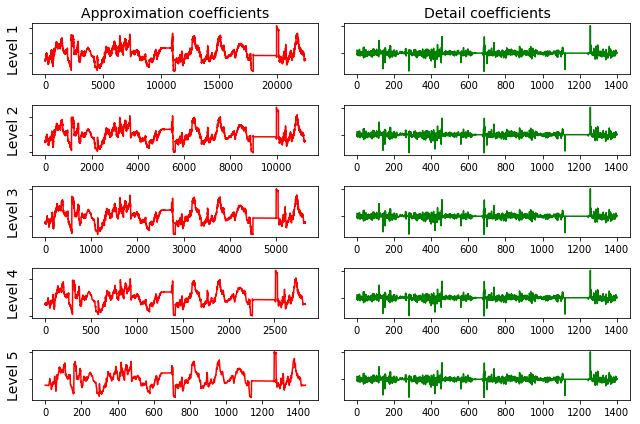

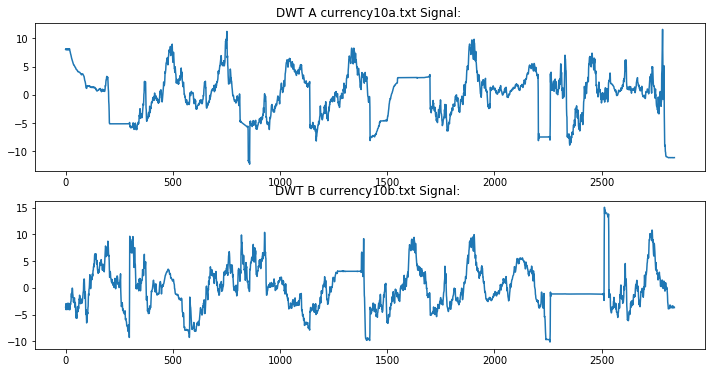

In [107]:
waveletname = 'sym20'

fig, ax = plt.subplots(2,1,figsize=(12,6))
ax[0].set_title("DWT A {} Signal: ".format(file_list_csv[2]))
ax[0].plot(dwA)
ax[1].set_title("DWT B {} Signal: ".format(file_list_csv[3]))
ax[1].plot(dwB)
plt.show()

dataA=dwA
fig, axarr = plt.subplots(nrows=5, ncols=2, figsize=(9,6))
for ii in range(5):
    
    dataA, coeff_dA = pywt.dwt(dataA, waveletname)
    
    axarr[ii, 0].plot(dataA, 'r')
    axarr[ii, 1].plot(coeff_d, 'g')
    axarr[ii, 0].set_ylabel("Level {}".format(ii + 1), fontsize=14, rotation=90)
    axarr[ii, 0].set_yticklabels([])
    if ii == 0:
        axarr[ii, 0].set_title("Approximation coefficients", fontsize=14)
        axarr[ii, 1].set_title("Detail coefficients", fontsize=14)
    axarr[ii, 1].set_yticklabels([])
plt.tight_layout()
plt.show()
dataB=dwB
fig, axarr = plt.subplots(nrows=5, ncols=2, figsize=(9,6))
for ii in range(5):
    
    dataB, coeff_dB = pywt.dwt(dataB, waveletname)
    
    axarr[ii, 0].plot(dataB, 'r')
    axarr[ii, 1].plot(coeff_d, 'g')
    axarr[ii, 0].set_ylabel("Level {}".format(ii + 1), fontsize=14, rotation=90)
    axarr[ii, 0].set_yticklabels([])
    if ii == 0:
        axarr[ii, 0].set_title("Approximation coefficients", fontsize=14)
        axarr[ii, 1].set_title("Detail coefficients", fontsize=14)
    axarr[ii, 1].set_yticklabels([])
plt.tight_layout()
plt.show()

idwA=pywt.idwt(dataA, coeff_dA,waveletname,'periodic')
idwB = pywt.idwt(dataB, coeff_dB, waveletname, 'periodic')

fig, ax = plt.subplots(2,1,figsize=(12,6))
ax[0].set_title("DWT A {} Signal: ".format(file_list_txt[0]))
ax[0].plot(idwA)
ax[1].set_title("DWT B {} Signal: ".format(file_list_txt[1]))
ax[1].plot(idwB)
plt.show()

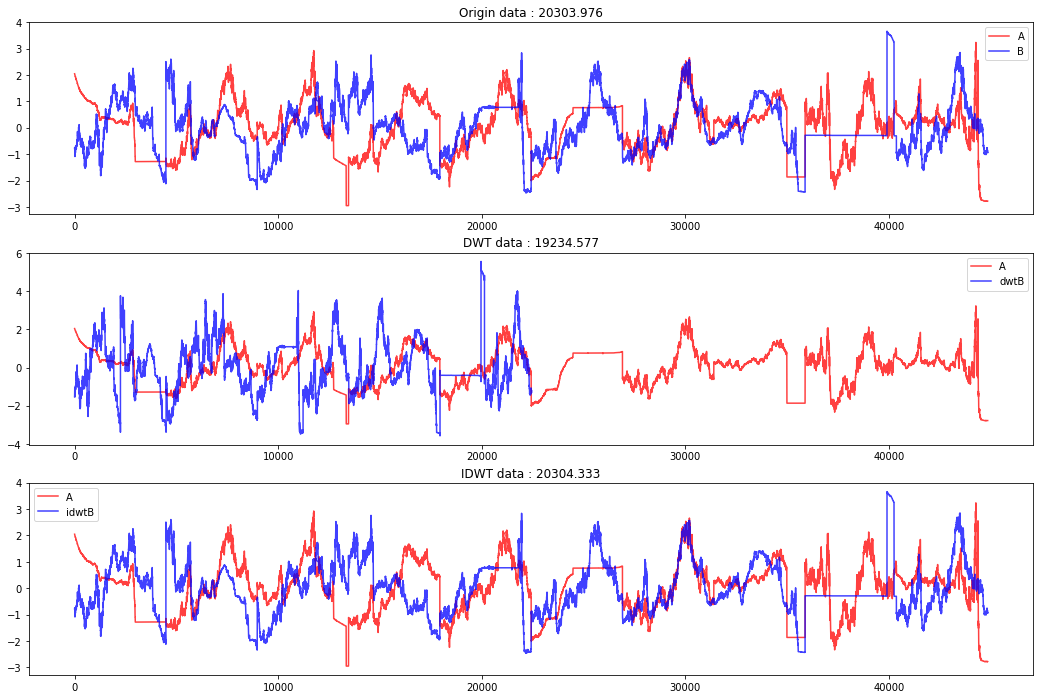

In [112]:
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean

dataA = dwA
dataB = dwB

dataA, coeff_dA = pywt.dwt(dataA, waveletname)
dataB, coeff_dB = pywt.dwt(dataB, waveletname)

idwA=pywt.idwt(dataA, coeff_dA,waveletname)
idwB = pywt.idwt(dataB, coeff_dB, waveletname)

distance, path = fastdtw(dwA, dwB, dist=euclidean)
distance_dwt, path_dwt = fastdtw(dwA, dataB, dist=euclidean)
distance_idwt, path_idwt = fastdtw(dwA, idwB, dist=euclidean)

fig, ax = plt.subplots(3,1,figsize=(18,12))

ax[0].set_title("Origin data : {}".format(round(distance,3)))
ax[0].plot(dwA,color='r',label='A',alpha=0.75)
ax[0].plot(dwB,color='b',label='B',alpha=0.75)
ax[0].legend()
ax[1].set_title("DWT data : {}".format(round(distance_dwt,3)))
ax[1].plot(dwA,color='r',label='A',alpha=0.75)
ax[1].plot(dataB,color='b',label='dwtB',alpha=0.75)
ax[1].legend()
ax[2].set_title("IDWT data : {}".format(round(distance_idwt,3)))
ax[2].plot(dwA,color='r',label='A',alpha=0.75)
ax[2].plot(idwB,color='b',label='idwtB',alpha=0.75)
ax[2].legend()
plt.show()